## Initialization

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from math import log10, sqrt

In [58]:
def PSNR(original, compressed):
  mse = np.mean((original-compressed)**2)
  if mse==0: #no noise in picture
    return 100
  max_pixel = 255.0
  psnr = 20*log10(max_pixel/sqrt(mse))
  return psnr

# Noise

## Salt & Pepper noise

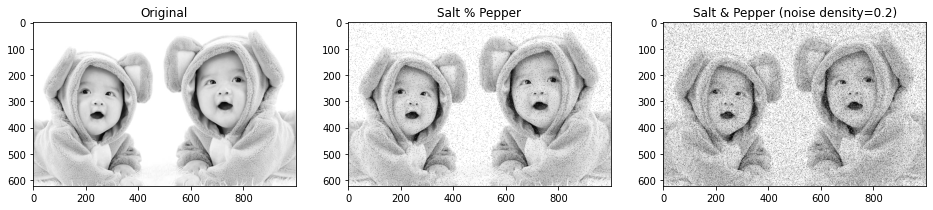

In [8]:
img = cv2.imread('twins.jpg',0)
sp = random_noise(img, mode='s&p')
sp2 = random_noise(img, mode='s&p', amount=0.2)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
fig.add_subplot(1,3,2), plt.imshow(sp, cmap='gray'), plt.title('Salt % Pepper')
fig.add_subplot(1,3,3), plt.imshow(sp2, cmap='gray'), plt.title('Salt & Pepper (noise density=0.2)')
plt.show()

## Gaussian noise

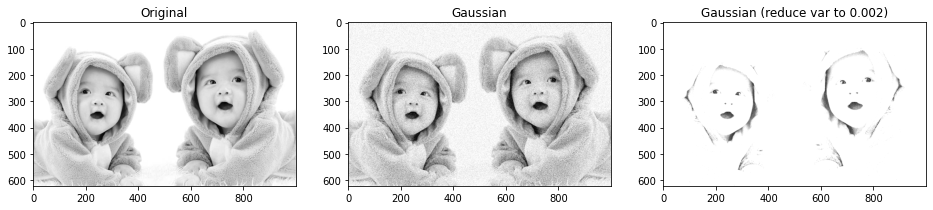

In [9]:
gauss = random_noise(img, mode='gaussian')
gauss2 = random_noise(img, mode='gaussian', var=0.002, mean=0.5)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
fig.add_subplot(1,3,2), plt.imshow(gauss, cmap='gray'), plt.title('Gaussian')
fig.add_subplot(1,3,3), plt.imshow(gauss2, cmap='gray'), plt.title('Gaussian (reduce var to 0.002)')
plt.show()

## Speckle noise

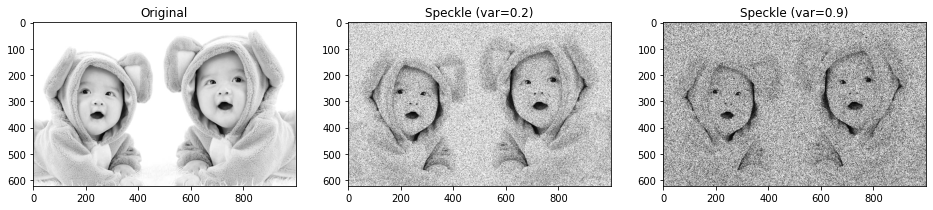

In [14]:
speckle = random_noise(img, mode='speckle', var=0.2)
speckle2 = random_noise(img, mode='speckle', var=0.9)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
fig.add_subplot(1,3,2), plt.imshow(speckle, cmap='gray'), plt.title('Speckle (var=0.2)')
fig.add_subplot(1,3,3), plt.imshow(speckle2, cmap='gray'), plt.title('Speckle (var=0.9)')
plt.show()

## Periodic noise

(250, 333)


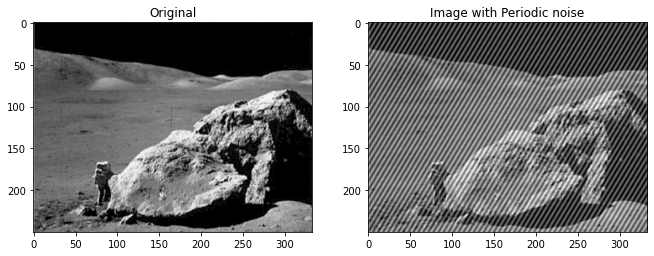

In [28]:
img = cv2.imread('nasa_image.png',0)

s = 100 #strength

nx, ny = img.shape
y = np.linspace(-nx/2,nx/2,nx)
x = np.linspace(-ny/2,ny/2,ny)
xv, yv = np.meshgrid(x,y)
p = s*(np.sin(np.pi*xv/3+np.pi*yv/5)+1.0)
print(img.shape)

img_pn = img.astype(float)+p

fig = plt.figure(figsize=(11,6))
fig.add_subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original')
fig.add_subplot(1,2,2), plt.imshow(img_pn, cmap='gray'), plt.title('Image with Periodic noise')
plt.show()

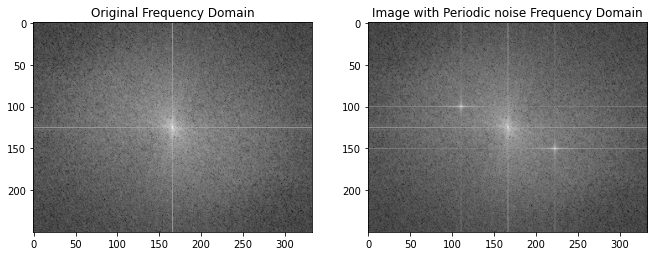

In [31]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

f2 = np.fft.fft2(img_pn)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = np.log(1+np.abs(fshift2))

fig = plt.figure(figsize=(11,6))
fig.add_subplot(1,2,1), plt.imshow(magnitude_spectrum,cmap='gray'), plt.title('Original Frequency Domain')
fig.add_subplot(1,2,2), plt.imshow(magnitude_spectrum2,cmap='gray'), plt.title('Image with Periodic noise Frequency Domain')
plt.show()

# Image restoration

## Avgerage filtering

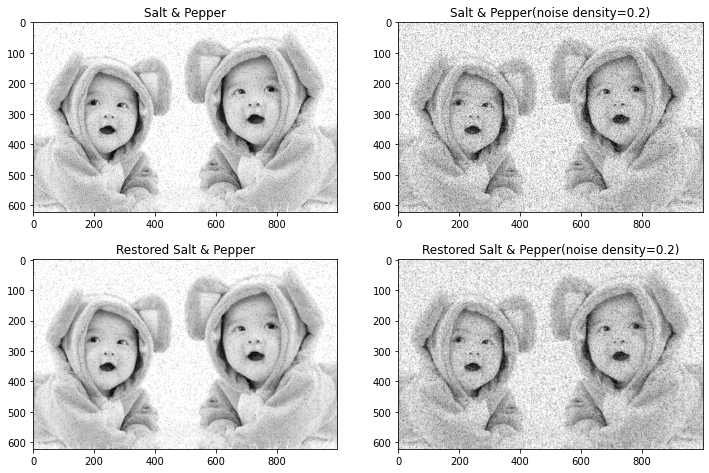

In [35]:
img = cv2.imread('twins.jpg',0)

img_sp = random_noise(img, mode='s&p')
img_sp2 = random_noise(img, mode='s&p',amount=0.2)

K_SIZE = 3

avg_filter = np.ones((K_SIZE,K_SIZE),np.float32)/(K_SIZE*K_SIZE)

img_sp_a3 = cv2.filter2D(img_sp, -1, avg_filter)
img_sp2_a3 = cv2.filter2D(img_sp2, -1, avg_filter)

fig = plt.figure(figsize=(12,8))
fig.add_subplot(2,2,1), plt.imshow(img_sp,cmap='gray'), plt.title('Salt & Pepper')
fig.add_subplot(2,2,2), plt.imshow(img_sp2,cmap='gray'), plt.title('Salt & Pepper(noise density=0.2)')
fig.add_subplot(2,2,3), plt.imshow(img_sp_a3,cmap='gray'), plt.title('Restored Salt & Pepper')
fig.add_subplot(2,2,4), plt.imshow(img_sp2_a3,cmap='gray'), plt.title('Restored Salt & Pepper(noise density=0.2)')
plt.show()

## Median filtering

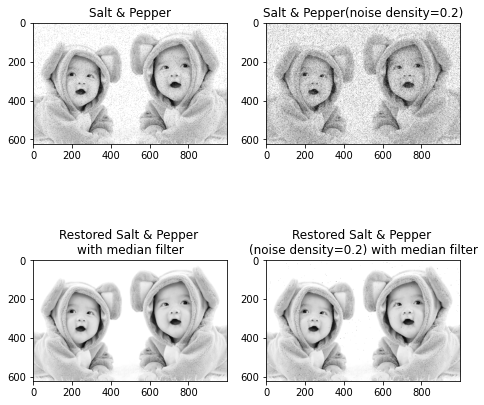

In [39]:
img = cv2.imread('twins.jpg',0)

img_sp = random_noise(img, mode='s&p')
img_sp2 = random_noise(img, mode='s&p',amount=0.2)
img_sp = np.array(255*img_sp, dtype='uint8')
img_sp2 = np.array(255*img_sp2, dtype='uint8')

fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,4,1), plt.imshow(img_sp, cmap='gray'), plt.title('Salt & Pepper')
fig.add_subplot(2,4,2), plt.imshow(img_sp2, cmap='gray'), plt.title('Salt & Pepper(noise density=0.2)')

img_md = cv2.medianBlur(img_sp,3)
img_md2 = cv2.medianBlur(img_sp2,3)
fig.add_subplot(2,4,5), plt.imshow(img_md, cmap='gray'), plt.title('Restored Salt & Pepper \nwith median filter')
fig.add_subplot(2,4,6), plt.imshow(img_md2, cmap='gray'), plt.title('Restored Salt & Pepper \n(noise density=0.2) with median filter')
plt.show()

## Gaussian filtering

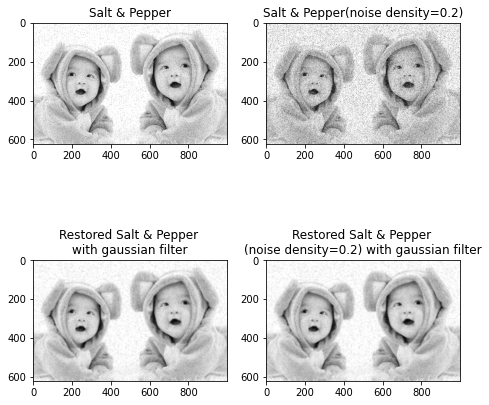

In [68]:
K_SIZE = 11

img_sp_g3 = cv2.GaussianBlur(sp,(K_SIZE,K_SIZE),0)
img_sp2_g3 = cv2.GaussianBlur(sp,(K_SIZE,K_SIZE),0)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,4,1), plt.imshow(img_sp, cmap='gray'), plt.title('Salt & Pepper')
fig.add_subplot(2,4,2), plt.imshow(img_sp2, cmap='gray'), plt.title('Salt & Pepper(noise density=0.2)')

fig.add_subplot(2,4,5), plt.imshow(img_sp_g3, cmap='gray'), plt.title('Restored Salt & Pepper \nwith gaussian filter')
fig.add_subplot(2,4,6), plt.imshow(img_sp2_g3, cmap='gray'), plt.title('Restored Salt & Pepper \n(noise density=0.2) with gaussian filter')
plt.show()

## Band reject filtering

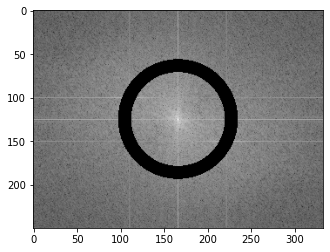

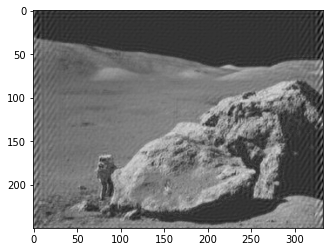

In [70]:
img = cv2.imread('nasa_image.png',0)

s = 100 #strength

nx, ny = img.shape
y = np.linspace(-nx/2,nx/2,nx)
x = np.linspace(-ny/2,ny/2,ny)
xv, yv = np.meshgrid(x,y)
p = s*(np.sin(np.pi*xv/3+np.pi*yv/5)+1.0)

img_pn = img.astype(float)+p

nx, ny = img_pn.shape
y = np.linspace(-nx/2,nx/2,nx)
x = np.linspace(-ny/2,ny/2,ny)
xv, yv = np.meshgrid(x,y)
radiusCoor = np.sqrt(xv**2 + yv**2)

r1 = radiusCoor < 54
r2 = radiusCoor >= 69
mask1 = np.ones([nx,ny])
bandReject = cv2.bitwise_or(r1.astype(np.uint8),r2.astype(np.uint8),mask=mask1.astype(np.uint8))
# plt.imshow(bandReject,cmap='gray')
# plt.show()

f = np.fft.fft2(img_pn)
fshift = np.fft.fftshift(f)
img_bandReject = bandReject * fshift
img_ft_filter_hp_spectrum = np.log(1+np.abs(img_bandReject))
plt.imshow(img_ft_filter_hp_spectrum, cmap='gray')
plt.show()

f_ishift_br = np.fft.ifftshift(img_bandReject)
img_restored_br = np.fft.ifft2(f_ishift_br)
img_restored_br = np.abs(img_restored_br)
plt.imshow(img_restored_br, cmap='gray')
plt.show()

## Notch filtering

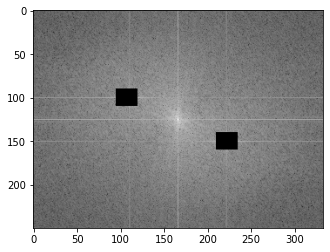

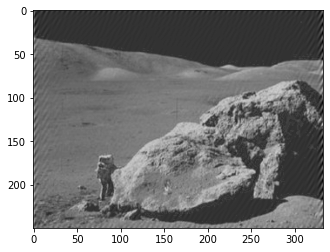

In [62]:
img = cv2.imread('nasa_image.png',0)

s = 100 #strength

nx, ny = img.shape
y = np.linspace(-nx/2,nx/2,nx)
x = np.linspace(-ny/2,ny/2,ny)
xv, yv = np.meshgrid(x,y)
p = s*(np.sin(np.pi*xv/3+np.pi*yv/5)+1.0)

img_pn = img.astype(float)+p

nx, ny = img_pn.shape
y = np.linspace(0,nx,nx)
x = np.linspace(0,ny,ny)
xv, yv = np.meshgrid(x,y)

f = np.fft.fft2(img_pn)
fshift = np.fft.fftshift(f)

im_notchFilter = fshift.copy()
im_notchFilter[90:110,95:120] = 0
im_notchFilter[140:160,210:235] = 0

img_ft_filter_nf_spectrum = np.log(1+np.abs(im_notchFilter))
plt.imshow(img_ft_filter_nf_spectrum, cmap='gray')
plt.show()


f_ishift_nf = np.fft.ifftshift(im_notchFilter)
img_restored_nf = np.fft.ifft2(f_ishift_nf)
img_restored_nf = np.abs(img_restored_nf)
plt.imshow(img_restored_nf, cmap='gray')
plt.show()

# Evaluate

In [69]:
original_img = cv2.imread('twins.jpg',0)
print('PSNR of gaussian filter on salt&pepper:',PSNR(original_img,img_sp_g3))
print('PSNR of median filter on salt&pepper:',PSNR(original_img,img_md),'\n')
print('PSNR of gaussian filter on salt&pepper(0.2):',PSNR(original_img,img_sp2_g3))
print('PSNR of median filter on salt&pepper(0.2):',PSNR(original_img,img_md2))

PSNR of gaussian filter on salt&pepper: 1.4592136437066667
PSNR of median filter on salt&pepper: 35.72554989245704 

PSNR of gaussian filter on salt&pepper(0.2): 1.4592136437066667
PSNR of median filter on salt&pepper(0.2): 35.02842993282741


In [71]:
original_img = cv2.imread('nasa_image.png',0)
print('PSNR of band reject filtering:',PSNR(original_img,img_restored_br))
print('PSNR of notch filtering:',PSNR(original_img,img_restored_nf))

PSNR of band reject filtering: 8.051415250792523
PSNR of notch filtering: 8.093013969484526
